# Reading data

In [38]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Exploring and Cleaning Data

In [39]:
# change to binary numbers 0 and 1.
change = {
    'no':0,
    'yes':1
}
df['sold'] = df.sold.map(change)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [40]:
# creating a column by age, to better work the data
from datetime import datetime
cur_year = datetime.today().year
df['model_age'] = cur_year - df['model_year']
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [41]:
# creating a column by km to better work with the data.

df['km_per_year'] = (df['mileage_per_year'] * 1.60934).round(2)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,23,35085.22
1,1,7843,1998,40557.96,1,25,12622.05
2,2,7109,2006,89627.50,0,17,11440.80
3,3,26823,2015,95276.14,0,8,43167.33
4,4,7935,2014,117384.68,1,9,12770.11


In [42]:
# dropping unessary columns
df = df.drop(columns= ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
df.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,35085.22
1,40557.96,1,25,12622.05
2,89627.50,0,17,11440.80
3,95276.14,0,8,43167.33
4,117384.68,1,9,12770.11


## Using LinearSVC

In [43]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

x = df[['price','model_age', 'km_per_year']]
y = df['sold']

SEED = 5 # define random numbers, will always return the same
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.25, stratify= y)
print(f"I'm going to train {len(train_x)} and test it with {len(test_x)} elements")

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'The accuracy of this model is: {(accuracy * 100).round(2)}%')

I'm going to train 7500 and test it with 2500 elements
The accuracy of this model is: 46.88%


/home/carlos/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


To define whether this result is good or bad, we still need a comparative basis, stipulating what would be the minimum acceptable hit - for example, if all guesses were 0 or 1.

## Using Dummy as Baseline
DummyClassifier, which is basically what the name says: a "dumb" classifier. This is because it has several very simple classification strategies.

In [44]:
# stratified or (stratified), that is, proportional.

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(train_x, train_y)
prediction = dummy_stratified.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'The accuracy of this dummy stratified model is: {(accuracy * 100).round(2)}%')


The accuracy of this dummy stratified model is: 52.44%


In [45]:
# most_frequent replaces missing values ​​with the most frequent value of the corresponding feature (column) in the training data.
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(train_x, train_y)
prediction = dummy_mostfrequent.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'The accuracy of this dummy mostfrequent model is: {(accuracy * 100).round(2)}%')

The accuracy of this dummy mostfrequent model is: 58.0%


In [46]:
# instead of calling predict, we will use the score, which will need to receive test_x and test_y as a parameter to perform the comparisons
dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(train_x, train_y)
acuracia = dummy_stratified.score(test_x, test_y) * 100

print(f'The accuracy of this dummy stratified model is: {(accuracy * 100).round(2)}%')

The accuracy of this dummy stratified model is: 58.0%


In [47]:
# instead of calling predict, we will use the score, which will need to receive test_x and test_y as a parameter to perform the comparisons
dummy_most_frequent = DummyClassifier(strategy = 'most_frequent')
dummy_most_frequent.fit(train_x, train_y)
acuracia = dummy_most_frequent.score(test_x, test_y) * 100

print(f'The accuracy of this dummy most_frequent model is: {(accuracy * 100).round(2)}%')

The accuracy of this dummy most_frequent model is: 58.0%


## Using SVC

The fixed SEED, the splitting of the training and test data, and the splitting of the raw training (the data before being rescaled).

Then the StandardScaler(), starting from the mean, shifts this data and divides it by the standard deviation, creating a range. With this training, the raw data is transformed into training_x and testing_x, which are then used in training and testing our model.

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # rescale
import numpy as np

SEED = 5  # define random numbers, will always return the same
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size= 0.25, stratify= y)
print(f"I'm going to train {len(train_x)} and test it with {len(test_x)} elements")

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(random_state = SEED, gamma='auto')
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'The accuracy of this model is: {(accuracy * 100).round(2)}%')

I'm going to train 7500 and test it with 2500 elements
The accuracy of this model is: 77.48%



So far, we have used two real classifiers based on Support Vector Machine, LinearSVC and SVC. We also use two simple classifiers (Dummy Classifiers) to define our baseline.

# DecisionTreeClassifier
There are algorithms that display a sequence of decisions based on the data provided, such as a car having less mileage and being newer, and how these decisions influence the classification, in a kind of "decision tree".

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # rescale
import numpy as np

SEED = 5  # define random numbers, will always return the same
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size= 0.25, stratify= y)
print(f"I'm going to train {len(train_x)} and test it with {len(test_x)} elements")

model = DecisionTreeClassifier(max_depth=3) # how many different conditions we want the algorithm to analyze before doing the sort.
model.fit(raw_train_x, train_y)
prediction = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'The accuracy of this model is: {(accuracy * 100).round(2)}%')

I'm going to train 7500 and test it with 2500 elements
The accuracy of this model is: 79.28%


Functionality of the sklearn.tree module to export the graphical view of the decision tree. The name of this function is export_graphviz:

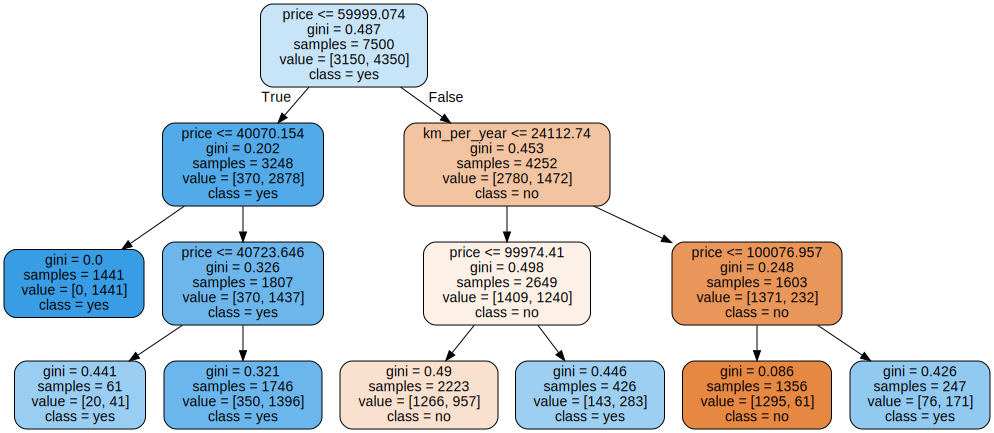

In [50]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns # declare column names

dot_data = export_graphviz(
    model,
    feature_names= features,
    filled=True, # colorful frames
    rounded=True, # rounded edges
    class_names= ['no', 'yes'] # class names: yes, which equals 1; and no, which equals 0.
)
dot_graph = graphviz.Source(dot_data)
dot_graph

### Analysis
In the first frame, we have price: 59999.074. If the price is less than or equal to this value, the car will be placed in the "yes" class, and our algorithm will make the decision that it will be sold. If the price is less than or equal to 40070.156, the algorithm will also decide to sell. The decision will also be positive if the price is greater than this value, but with a little less certainty (represented by a lighter shade of blue).

If the price is greater than 59999074, the classifier will make a negative decision. The next decision will be made according to km_per_year: if this value is greater than 24112.742, the algorithm will decide that the car will not be sold; if it is less than or equal, the decision will be the same, but with less certainty.

There is other information in the decision tree, for example samples, which show us how much data is included in a given situation. In the first frame, the samples value will be 7500, as this is the total amount of data we have made available; in the second frame from the left (in blue) we will have 3248, with the remainder (4252) in the left frame (in salmon tone); and so on.

To measure whether it is worth breaking the tree into two pieces for each decision, the algorithm uses several parameters. One of these is the gini, which is also displayed on these boards.